In [2]:
import squidpy as sq
import scanpy as sc

In [3]:
adata = sc.read_h5ad('data/GSE248608/GSM7917894_CA1.h5ad')
adata

AnnData object with n_obs × n_vars = 4992 × 37487
    obs: 'Batch'
    uns: 'Batch_colors', 'spatial'
    obsm: 'spatial'

In [16]:
adata.uns['spatial']['GSM7917894_CA1']['scalefactors']

{'fiducial_diameter_fullres': 192.13406039577904,
 'spot_diameter_fullres': 118.94013262595847,
 'tissue_hires_scalef': 0.12207031,
 'tissue_lowres_scalef': 0.036621094}

In [9]:
import pandas as pd

/tmp/ipykernel_52293/912358513.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='Batch')


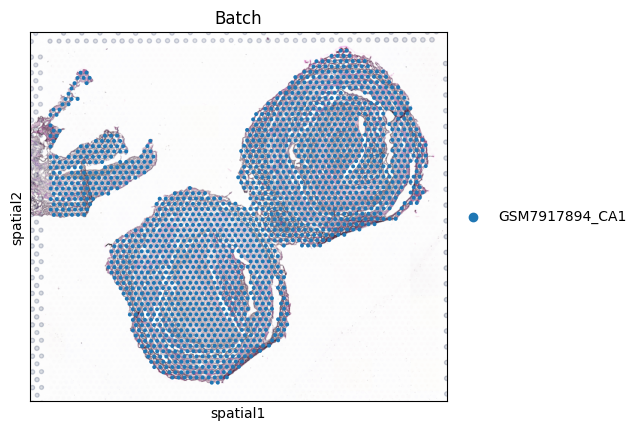

In [12]:
sc.pl.spatial(adata, color='Batch')

{'fiducial_diameter_fullres': 192.13406039577904,
 'spot_diameter_fullres': 118.94013262595847,
 'tissue_hires_scalef': 0.12207031,
 'tissue_lowres_scalef': 0.036621094}

{'spot_diameter_fullres': 6.0,
 'tissue_hires_scalef': 0.12207031,
 'tissue_lowres_scalef': 1.0}

/tmp/ipykernel_52293/1702268076.py:23: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='Batch', size=10)


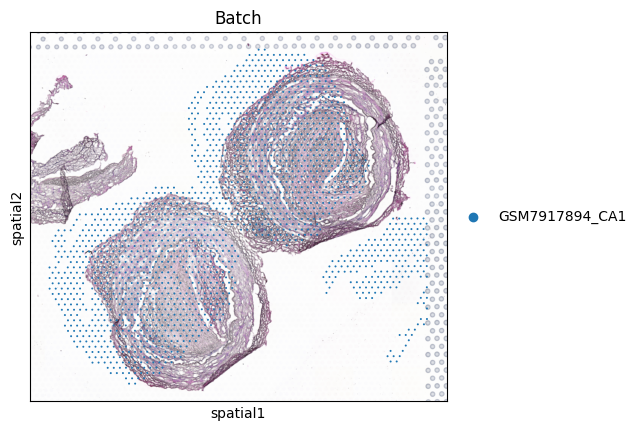

In [58]:
import scanpy as sc
import pandas as pd
import numpy as np
import json

# Load original AnnData
adata = sc.read_h5ad("data/GSE248608/GSM7917894_CA1.h5ad")

# Load transformed coordinates
coords = pd.read_csv("transformed_coords.tsv", sep="\t", index_col=0)
adata.obsm["spatial"] = coords.values

display(adata.uns["spatial"]['GSM7917894_CA1']['scalefactors'])

# Load updated scalefactors
with open("scalefactors_json.json") as f:
    adata.uns["spatial"]['GSM7917894_CA1']['scalefactors'] = json.load(f)

# adata.uns["spatial"]['GSM7917894_CA1']['scalefactors']['fiducial_diameter_fullres'] = 192.13406039577904
# adata.uns["spatial"]['GSM7917894_CA1']['scalefactors']['tissue_hires_scalef'] *= 8.2
# adata.uns["spatial"]['GSM7917894_CA1']['scalefactors']['spot_diameter_fullres'] *= 118.94013262595847
display(adata.uns["spatial"]['GSM7917894_CA1']['scalefactors'])
sc.pl.spatial(adata, color='Batch', size=10)